In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

import re
import string

In [78]:
df = pd.read_csv('../data/Reviews.csv')
df.dropna(inplace=True)  # Hapus data kosong

In [79]:
def get_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['Score'].apply(get_sentiment)
print(df['sentiment'].value_counts())



sentiment
positive    443756
negative     82007
neutral      42638
Name: count, dtype: int64


In [80]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Hapus tag HTML
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Hapus URL
    text = re.sub(r'[^a-z\s]', '', text)  # Hapus karakter non-abjad
    return text

df['clean_review'] = df['Text'].apply(clean_text)

In [81]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['clean_review'])

In [82]:
y = df['sentiment']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\asus-\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.66      0.70     16452
     neutral       0.51      0.18      0.26      8460
    positive       0.89      0.97      0.93     88769

    accuracy                           0.86    113681
   macro avg       0.72      0.60      0.63    113681
weighted avg       0.84      0.86      0.85    113681



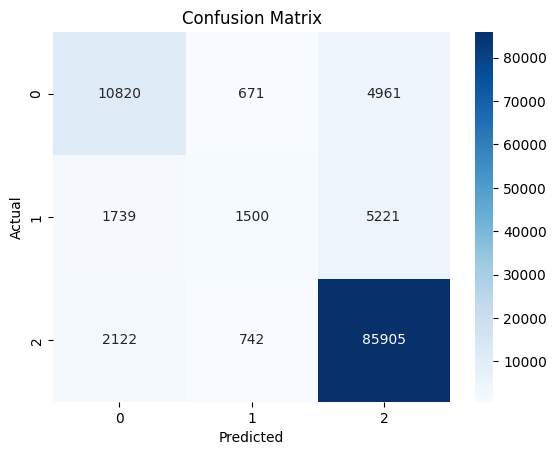

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('../results/confusion_matrix.png')
plt.show()

In [87]:
joblib.dump(model, '../models/sentiment_model.pkl')
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


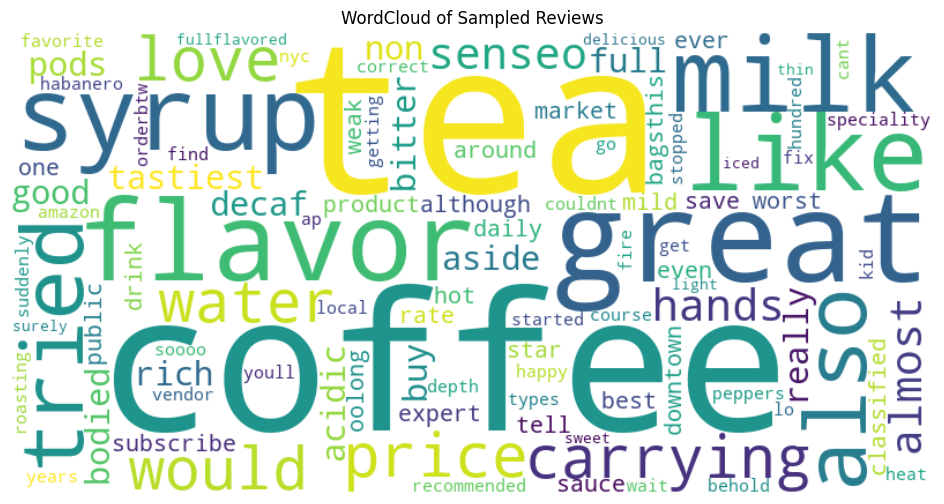

C:\Users\asus-\AppData\Local\Temp\ipykernel_15576\3959805555.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(x), y=list(y), palette='viridis')


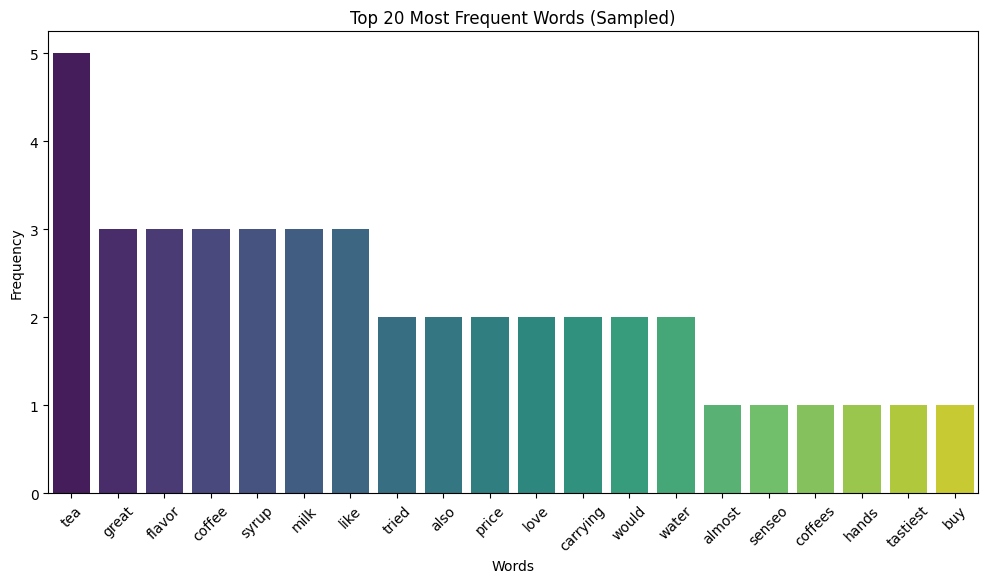

In [88]:
# Tambahan import
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Unduh stopwords
nltk.download('stopwords')

# 1. Sampling aman dari dataframe
df_sampled = df.sample(n=200, random_state=1)  # Ambil hanya 200 review acak
sample_text = ' '.join(df_sampled['clean_review'])

# 2. Batasi jumlah kata yang dianalisis
limited_words = ' '.join(sample_text.split()[:300])  # Batasi ke 300 kata

# 3. WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=set(stopwords.words('english')),
                      max_words=100).generate(limited_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Sampled Reviews')
plt.show()

# 4. Bar Plot
words = [word for word in limited_words.split() if word not in stopwords.words('english')]
word_freq = Counter(words)
common_words = word_freq.most_common(20)

if common_words:  # Cek agar tidak error saat tidak ada data
    x, y = zip(*common_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(x), y=list(y), palette='viridis')
    plt.xticks(rotation=45)
    plt.title('Top 20 Most Frequent Words (Sampled)')
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()
else:
    print("Tidak ada kata umum yang cukup untuk ditampilkan.")
